#**Importing the Necessory Libraries**

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

#**Loading and Exploring the DataSet**

In [4]:
df = pd.read_csv("car_data.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80572 entries, 0 to 80571
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Make             80572 non-null  object
 1   Model            80572 non-null  object
 2   Version          73800 non-null  object
 3   Price            80572 non-null  object
 4   Make_Year        80572 non-null  int64 
 5   CC               80572 non-null  int64 
 6   Assembly         80572 non-null  object
 7   Mileage          80572 non-null  int64 
 8   Registered City  80572 non-null  object
 9   Transmission     80572 non-null  object
dtypes: int64(3), object(7)
memory usage: 6.1+ MB


,Make_Year,CC,Mileage
count,80572.000000,80572.000000,80572.000000
mean,2011.724209,1404.083267,85653.660080
std,6.953399,684.458171,82241.870901
min,1990.000000,1.000000,1.000000
25%,2007.000000,1000.000000,36500.000000
50%,2013.000000,1300.000000,73000.000000
75%,2017.000000,1600.000000,110520.000000
max,2021.000000,10000.000000,999999.000000


#**Checking Null values in the Dataset and Duplicated rows as well**

In [9]:
print("Missing Values:")
print(df.isnull().sum())

print("\nDuplicated Rows:")
print(df.duplicated().sum())


Missing Values:
Make                  0
Model                 0
Version            6772
Price                 0
Make_Year             0
CC                    0
Assembly              0
Mileage               0
Registered City       0
Transmission          0
dtype: int64

Duplicated Rows:
1684


#**Pre-Processing of Dataset**
**Data preprocessing involves handling missing values, handling duplicated rows, encoding categorical variables, and scaling numerical features.**

In [10]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

df.reset_index(drop=True, inplace=True)


#**Checking Price Column**
**Checking if all values are numerical or not**

In [11]:
call_for_price_count = (df['Price'] == 'Call for price').sum()
print("Total rows with 'Call for price' in the Price column:", call_for_price_count)

Total rows with 'Call for price' in the Price column: 1036


**Dropping those rows with string values**

In [13]:
df = df[df['Price'] != 'Call for price']
df['Price'] = pd.to_numeric(df['Price'])
print(df.isnull().sum())

Make               0
Model              0
Version            0
Price              0
Make_Year          0
CC                 0
Assembly           0
Mileage            0
Registered City    0
Transmission       0
dtype: int64


#**Encoding Categorical Variables**
**We need to convert categorical variables to numerical format using techniques like one-hot encoding or label encoding.**



In [14]:
df = pd.get_dummies(df, columns=['Make', 'Model', 'Version', 'Assembly', 'Registered City', 'Transmission'], drop_first=True)

#**Scaling Numerical Features**
**We will scale numerical features to ensure all features contribute equally to the model.**

In [15]:
features_to_scale = ['Make_Year', 'CC', 'Mileage']
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


#**Feature Engineering**
**We are Applying Feature Engineering to improve the model predictive power**

In [16]:
df['Car_Age'] = 2024 - df['Make_Year']
df.drop('Make_Year', axis=1, inplace=True)


#**Now Model Selection and Training**
**We are splitting our dataset into train and test set and then we train multiple regression model to get the best result for it**

In [17]:
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#**Training different Models & Evaluation**
**We will try different regression models such as Linear Regression, Decision Tree, Random Forest, and Gradient Boosting.**
**We will also Evaluate the mean squared error and r2 score for each model.**

In [30]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

model_names=[]
r2_scores=[]

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    model_names.append(name)
    r2_scores.append(r2)
    print(f'{name} RMSE: {rmse}')
    print(f'{name} R²: {r2}')

Linear Regression RMSE: 6159283033169541.0
Linear Regression R²: -2.8413883481825495e+18
Decision Tree RMSE: 799296.4027310535
Decision Tree R²: 0.9521495540873104
Random Forest RMSE: 727320.5923366025
Random Forest R²: 0.9603793095092732
Gradient Boosting RMSE: 935242.2090691681
Gradient Boosting R²: 0.9344883601570692


#**Visualizing the Evaluation of Each model**

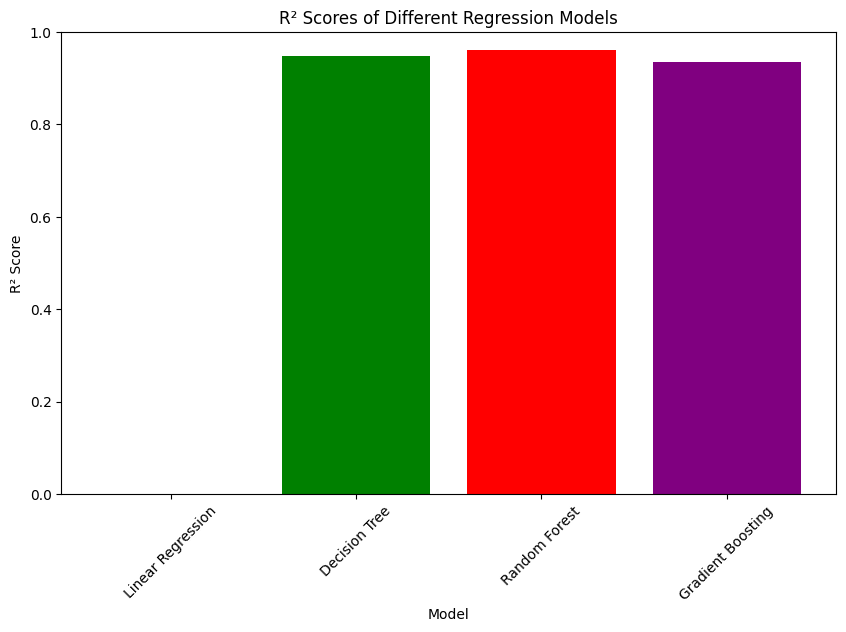

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('R² Scores of Different Regression Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

#**Report for Task 1:-**
####**For the first task i reviewed the dataset. The dataset has many missing and duplicating values which cause many challanges e.g drop. I tried different techniques for the preprocessing after cleaning the data set i applied the one hot encoders to convert categorical values in to numerical values then apply the feature scaling so that each feature should work equally for the models thats best technique to get best result after that appliedd the feature engineering and then afterwards i split the data set and applied different regressor models to get best evaluted result from one of them. We can also apply the hypertuning of the best model but it can or it may lead us to overfitting of the model**